In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_theme()
plt.style.use('seaborn')

# Import DataFrame

In [2]:
path = "../Reporting-CitiesInVietNam/Dataset/"

for file in os.listdir(path):
    if file.endswith('worldcities.csv') : df_WorldCities = pd.read_csv(path+file)

df_WorldCities.head(5)


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,Area (km2)
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764,NaN
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077,NaN
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604,NaN
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629,NaN
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140,NaN


# Xử lý tiền dữ liệu (Clean and Process data)

In [3]:
print(set(df_WorldCities['country']))

{'Afghanistan', 'Algeria', 'Antigua And Barbuda', 'French Guiana', 'Reunion', 'Japan', 'Singapore', 'Uruguay', 'Mongolia', 'China', 'Mexico', 'Finland', 'Bahrain', 'Marshall Islands', 'Liechtenstein', 'Lebanon', 'Qatar', 'Micronesia, Federated States Of', 'Trinidad And Tobago', 'India', 'Chile', 'Sao Tome And Principe', 'Tunisia', 'Burundi', 'Lithuania', 'Namibia', 'Gambia, The', 'Congo (Brazzaville)', 'Côte D’Ivoire', 'Zambia', 'Bosnia And Herzegovina', 'Iran', 'Bhutan', 'Israel', 'Comoros', 'Moldova', 'Mali', 'Haiti', 'Benin', 'Monaco', 'Turkey', 'Togo', 'Guyana', 'Ecuador', 'Georgia', 'Hungary', 'Kosovo', 'San Marino', 'New Caledonia', 'Angola', 'Albania', 'Saint Vincent And The Grenadines', 'Paraguay', 'Papua New Guinea', 'Belgium', 'Tonga', 'Saint Lucia', 'Turkmenistan', 'Oman', 'Falkland Islands (Islas Malvinas)', 'Saint Kitts And Nevis', 'Guinea', 'Tuvalu', 'Zimbabwe', 'Wallis And Futuna', 'Malta', 'American Samoa', 'Iraq', 'Chad', 'Bulgaria', 'Philippines', 'Mauritius', 'Turks 

In [4]:
df_VietNamCities = df_WorldCities[df_WorldCities["country"] == "Vietnam"]

In [5]:
df_VietNamCities.reset_index(drop=True, inplace=True)
df_VietNamCities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,Area (km2)
0,Hanoi,Hanoi,21.0245,105.8412,Vietnam,VN,VNM,Hà Nội,primary,7785000.0,1704413791,3324.92
1,Ho Chi Minh City,Ho Chi Minh City,10.8167,106.6333,Vietnam,VN,VNM,Hồ Chí Minh,admin,13312000.0,1704774326,2095.00
2,Haiphong,Haiphong,20.8000,106.6667,Vietnam,VN,VNM,Hải Phòng,admin,2103500.0,1704000623,1507.57
3,Cần Thơ,Can Tho,10.0333,105.7833,Vietnam,VN,VNM,Cần Thơ,admin,1237300.0,1704783472,1389.60
4,Đà Nẵng,Da Nang,16.0748,108.2240,Vietnam,VN,VNM,Đà Nẵng,admin,887069.0,1704949870,1255.53
...,...,...,...,...,...,...,...,...,...,...,...,...
71,Phủ Lý,Phu Ly,20.5453,105.9122,Vietnam,VN,VNM,Hà Nam,admin,121350.0,1704841896,34.27
72,Bắc Giang,Bac Giang,21.2731,106.1947,Vietnam,VN,VNM,Bắc Giang,admin,53728.0,1704256754,32.21
73,Ấp Đa Lợi,Ap Da Loi,11.9304,108.4200,Vietnam,VN,VNM,Lâm Đồng,NaN,256019.0,1704613422,NaN
74,Luân Châu,Luan Chau,21.7400,103.3430,Vietnam,VN,VNM,Điện Biên,NaN,7335.0,1704201464,NaN


In [6]:
df_VietNamCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        76 non-null     object 
 1   city_ascii  76 non-null     object 
 2   lat         76 non-null     float64
 3   lng         76 non-null     float64
 4   country     76 non-null     object 
 5   iso2        76 non-null     object 
 6   iso3        76 non-null     object 
 7   admin_name  76 non-null     object 
 8   capital     68 non-null     object 
 9   population  76 non-null     float64
 10  id          76 non-null     int64  
 11  Area (km2)  73 non-null     float64
dtypes: float64(4), int64(1), object(7)
memory usage: 5.1+ KB


In [7]:
print (set(df_VietNamCities['population']))

{13312000.0, 57856.0, 1104000.0, 278658.0, 315270.0, 67206.0, 268167.0, 256393.0, 121350.0, 121486.0, 330000.0, 490000.0, 72722.0, 103314.0, 165396.0, 205333.0, 256019.0, 242840.0, 41112.0, 137498.0, 96540.0, 887069.0, 260252.0, 340000.0, 148000.0, 126370.0, 277539.0, 150052.0, 250660.0, 131360.0, 7335.0, 7785000.0, 29227.0, 97200.0, 59442.0, 1237300.0, 142900.0, 244277.0, 179773.0, 137662.0, 455230.0, 120256.0, 520000.0, 1000000.0, 160325.0, 122568.0, 2103500.0, 149837.0, 36430.0, 507469.0, 393294.0, 146771.0, 130517.0, 392279.0, 311000.0, 40279.0, 38362.0, 327000.0, 121309.0, 42973.0, 156000.0, 300000.0, 53728.0, 225000.0, 213610.0, 189547.0, 352108.0, 19054.0, 124143.0, 70000.0, 70639.0, 157298.0, 172915.0, 121716.0, 17662.0, 125311.0}


In [8]:
print (set(df_VietNamCities['capital']))

{nan, 'primary', 'admin', 'minor'}


In [9]:
values = {"capital": "admin"}
df_VietNamCities = df_VietNamCities.fillna(values)
df_VietNamCities.fillna(values)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,Area (km2)
0,Hanoi,Hanoi,21.0245,105.8412,Vietnam,VN,VNM,Hà Nội,primary,7785000.0,1704413791,3324.92
1,Ho Chi Minh City,Ho Chi Minh City,10.8167,106.6333,Vietnam,VN,VNM,Hồ Chí Minh,admin,13312000.0,1704774326,2095.00
2,Haiphong,Haiphong,20.8000,106.6667,Vietnam,VN,VNM,Hải Phòng,admin,2103500.0,1704000623,1507.57
3,Cần Thơ,Can Tho,10.0333,105.7833,Vietnam,VN,VNM,Cần Thơ,admin,1237300.0,1704783472,1389.60
4,Đà Nẵng,Da Nang,16.0748,108.2240,Vietnam,VN,VNM,Đà Nẵng,admin,887069.0,1704949870,1255.53
...,...,...,...,...,...,...,...,...,...,...,...,...
71,Phủ Lý,Phu Ly,20.5453,105.9122,Vietnam,VN,VNM,Hà Nam,admin,121350.0,1704841896,34.27
72,Bắc Giang,Bac Giang,21.2731,106.1947,Vietnam,VN,VNM,Bắc Giang,admin,53728.0,1704256754,32.21
73,Ấp Đa Lợi,Ap Da Loi,11.9304,108.4200,Vietnam,VN,VNM,Lâm Đồng,admin,256019.0,1704613422,NaN
74,Luân Châu,Luan Chau,21.7400,103.3430,Vietnam,VN,VNM,Điện Biên,admin,7335.0,1704201464,NaN


In [10]:
df_VietNamCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        76 non-null     object 
 1   city_ascii  76 non-null     object 
 2   lat         76 non-null     float64
 3   lng         76 non-null     float64
 4   country     76 non-null     object 
 5   iso2        76 non-null     object 
 6   iso3        76 non-null     object 
 7   admin_name  76 non-null     object 
 8   capital     76 non-null     object 
 9   population  76 non-null     float64
 10  id          76 non-null     int64  
 11  Area (km2)  73 non-null     float64
dtypes: float64(4), int64(1), object(7)
memory usage: 5.1+ KB


In [11]:
df_VietNamCities=df_VietNamCities.dropna()
df_VietNamCities['Area (km2)'].astype('float64')
df_VietNamCities.to_csv(path+"VietNam_cities.csv")
df_VietNamCities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        73 non-null     object 
 1   city_ascii  73 non-null     object 
 2   lat         73 non-null     float64
 3   lng         73 non-null     float64
 4   country     73 non-null     object 
 5   iso2        73 non-null     object 
 6   iso3        73 non-null     object 
 7   admin_name  73 non-null     object 
 8   capital     73 non-null     object 
 9   population  73 non-null     float64
 10  id          73 non-null     int64  
 11  Area (km2)  73 non-null     float64
dtypes: float64(4), int64(1), object(7)
memory usage: 5.4+ KB


In [12]:
df_VietNamCities.describe()

,lat,lng,population,id,Area (km2)
count,73.000000,73.000000,7.300000e+01,7.300000e+01,73.000000
mean,15.787627,106.470004,5.309501e+05,1.704484e+09,271.902192
std,4.860807,1.416055,1.781417e+06,3.429112e+05,504.124521
min,9.183300,103.016900,1.766200e+04,1.704000e+09,32.210000
25%,10.937500,105.692200,1.202560e+05,1.704220e+09,73.550000
50%,15.566700,106.250000,1.560000e+05,1.704443e+09,110.990000
75%,20.950000,107.200000,3.000000e+05,1.704845e+09,250.300000
max,22.823300,109.310600,1.331200e+07,1.704993e+09,3324.920000


In [13]:
df_VietNamCities.head(5)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,Area (km2)
0,Hanoi,Hanoi,21.0245,105.8412,Vietnam,VN,VNM,Hà Nội,primary,7785000.0,1704413791,3324.92
1,Ho Chi Minh City,Ho Chi Minh City,10.8167,106.6333,Vietnam,VN,VNM,Hồ Chí Minh,admin,13312000.0,1704774326,2095.00
2,Haiphong,Haiphong,20.8000,106.6667,Vietnam,VN,VNM,Hải Phòng,admin,2103500.0,1704000623,1507.57
3,Cần Thơ,Can Tho,10.0333,105.7833,Vietnam,VN,VNM,Cần Thơ,admin,1237300.0,1704783472,1389.60
4,Đà Nẵng,Da Nang,16.0748,108.2240,Vietnam,VN,VNM,Đà Nẵng,admin,887069.0,1704949870,1255.53


# Trực quan hóa dữ liệu (Data Visualization)
### Lat = Vĩ độ , Longd = Kinh độ

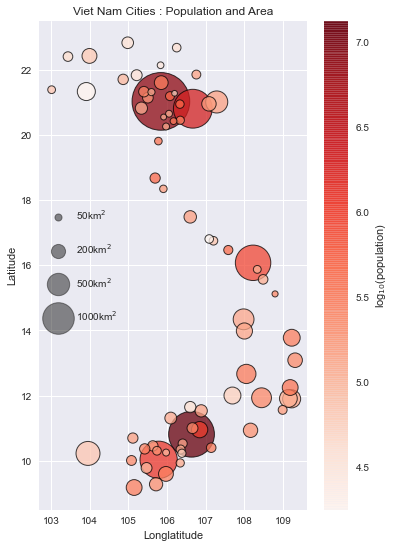

In [14]:
lat , lon = df_VietNamCities['lat'],df_VietNamCities['lng']
popultn, area= df_VietNamCities['population'],df_VietNamCities['Area (km2)']

fig , ax = plt.subplots(figsize=(6,9))
ax1 = ax.scatter(lon,lat,c=np.log10(popultn),cmap='Reds',linewidths=1,edgecolor="black",s=area,alpha=0.75)
ax.set(xlabel = 'Longlatitude',ylabel ='Latitude',title='Viet Nam Cities : Population and Area')

area_range = [50,200,500,1000]
for Area in area_range : 
    ax.scatter([],[],s=Area,c='k',label=str(Area)+'km$^2$',alpha=0.5,linewidths=1)

plt.legend(labelspacing=2,loc='center left')
plt.colorbar(ax1,label='log$_{10}$(population)');